In [1]:
import numpy as np 
import pandas as pd 
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd



print(os.listdir("proj")) 

c:\users\appuk\appdata\local\programs\python\python36\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.19) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


['.ipynb_checkpoints', 'cell_images']


In [2]:
print(len(os.listdir("proj/cell_images/Parasitized")))
print(len(os.listdir("proj/cell_images/Uninfected")))

13780
13780


In [3]:

try:
    os.mkdir('proj/images')
    os.mkdir('proj/images/training')
    os.mkdir('proj/images/testing')
    os.mkdir('proj/images/training/para')
    os.mkdir('proj/images/training/uninf')
    os.mkdir('proj/images/testing/para')
    os.mkdir('proj/images/testing/uninf')
    
except OSError:
    pass

In [4]:


def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

CAT_SOURCE_DIR = "proj/cell_images/Parasitized/"
TRAINING_CATS_DIR = "proj/images/training/para/"
TESTING_CATS_DIR = "proj/images/testing/para/"
DOG_SOURCE_DIR = "proj/cell_images/Uninfected/"
TRAINING_DOGS_DIR = "proj/images/training/uninf/"
TESTING_DOGS_DIR = "proj/images/testing/uninf/"



split_size = 0.9


split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [5]:
print(len(os.listdir("proj/images/training/para/")))
print(len(os.listdir("proj/images/testing/para/")))
print(len(os.listdir("proj/images/training/uninf/")))
print(len(os.listdir("proj/images/testing/uninf/")))

12402
1378
12402
1378


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])


model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

c:\users\appuk\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
TRAINING_DIR = "proj/images/training/"
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 


VALIDATION_DIR = "proj/images/testing/" 
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=10,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 24802 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


In [9]:


history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)


c:\users\appuk\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\engine\training.py:1935: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
2481/2481 [==============================] - 556s 224ms/step - loss: 0.3173 - acc: 0.8930 - val_loss: 0.2347 - val_acc: 0.9481
Epoch 2/5
2481/2481 [==============================] - 515s 208ms/step - loss: 0.2041 - acc: 0.9441 - val_loss: 0.2216 - val_acc: 0.9550
Epoch 3/5
2481/2481 [==============================] - 479s 193ms/step - loss: 0.1857 - acc: 0.9487 - val_loss: 0.2418 - val_acc: 0.9285
Epoch 4/5
2481/2481 [==============================] - 462s 186ms/step - loss: 0.1883 - acc: 0.9497 - val_loss: 0.1809 - val_acc: 0.9575
Epoch 5/5
2481/2481 [==============================] - 452s 182ms/step - loss: 0.1820 - acc: 0.9493 - val_loss: 0.1694 - val_acc: 0.9517


Text(0.5, 1.0, 'Training and validation loss')

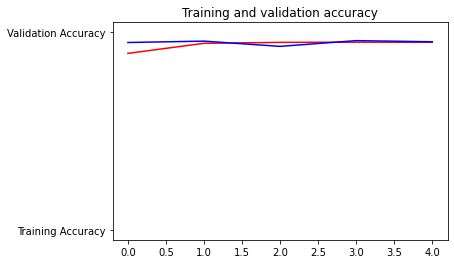

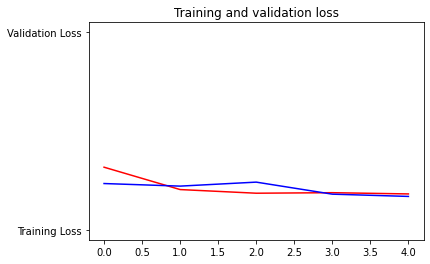

In [10]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [12]:
model.save('malaria_detection_model.h5')